In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('clean_data.csv')
del df['Unnamed: 0']
del df['opening_pgn']
del df['pgn']
del df['game_id']
df

,eco,opening,white_rating,black_rating,white_result,black_result,time_class,time_control,white_bracket,black_bracket
0,A21,English,1330,1384,checkmated,win,blitz,180,1300,1300
1,B01,Scandinavian,921,833,win,checkmated,blitz,300,900,800
2,A00,Uncommon Opening,1003,444,win,checkmated,bullet,60,1000,400
3,C23,Bishop's Opening,496,351,win,checkmated,blitz,180,400,300
4,A45,Queen's Pawn Game,1814,1761,win,resigned,rapid,600,1800,1700
...,...,...,...,...,...,...,...,...,...,...
9779,C20,King's Pawn Game,648,675,win,checkmated,rapid,600,600,600
9780,A10,English,1226,1197,win,timeout,bullet,60,1200,1100
9781,B10,Caro-Kann,887,864,resigned,win,rapid,600,800,800
9782,A01,Nimzovich-Larsen Attack,1799,1731,win,resigned,blitz,180,1700,1700


### Linear Regression
Basic framework of a linear regression model:
- find out the mean squared error for all the points
- find out the gradient descent (minimize the above function)
- plot the line based on the gradient descent function

In [4]:
# how do we determine when white has won the game
df = df.loc[(df['white_rating'] > 1000) & (df['black_rating'] > 1000)]
#plt.scatter(df['white_rating'], df['black_rating'])
df

,eco,opening,white_rating,black_rating,white_result,black_result,time_class,time_control,white_bracket,black_bracket
0,A21,English,1330,1384,checkmated,win,blitz,180,1300,1300
4,A45,Queen's Pawn Game,1814,1761,win,resigned,rapid,600,1800,1700
8,A22,English,1183,1151,win,timeout,blitz,300,1100,1100
9,B22,"Sicilian, Alapin",1533,1542,insufficient,insufficient,rapid,600,1500,1500
10,B01,Scandinavian,1048,1032,resigned,win,blitz,180,1000,1000
...,...,...,...,...,...,...,...,...,...,...
9770,C00,French Defense,1323,1320,timeout,win,bullet,60,1300,1300
9774,B06,Robatsch,1066,1049,win,resigned,blitz,180,1000,1000
9780,A10,English,1226,1197,win,timeout,bullet,60,1200,1100
9782,A01,Nimzovich-Larsen Attack,1799,1731,win,resigned,blitz,180,1700,1700


Let us now find out the mean squared error for all the points in the chosed dataset for all players with a rating above 2000. 

In [5]:
def mean_squared_error(m, c, df):
    error = 0
    for i in range(len(df)):
        x = df.iloc[i].white_rating
        y = df.iloc[i].black_rating
        error += (y-(m*x + c)) ** 2
    mse = error/float(len(df))
    print(mse)

We will have to normalize the data due to the large variation in values of x and y

Let us now minimize this function using gradient descent

In [28]:
def gradient_descent(m_now, c_now, df, L):
    m_grad = 0
    c_grad = 0
    n = len(df)
    for i in range(n):
        x = df.iloc[i].white_rating
        y = df.iloc[i].black_rating

        m_grad += -(2/n) * x * (y - (m_now * x + c_now))
        c_grad += -(2/n) * (y - (m_now * x + c_now))

        #print(m_grad, c_grad)

    m = m_now - m_grad * L
    c = c_now - c_grad * L
    return m,c

gradient_descent(0,0,df, 0.0001)

(412.80314200000026, 0.28056999999999993)

Testing it out

Optimized parameters: m = 0.9989184594793619 c = 0.0008666846851325048


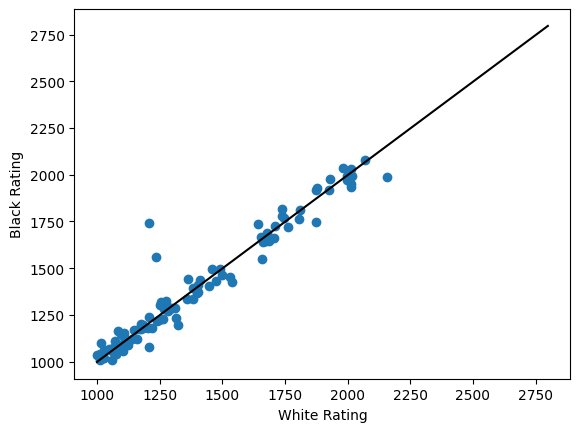

In [33]:
m = 0
c = 0
L = 0.0000001 # the important observation is that decreasing L has given positive and desired m and c results
# Learning rate is a parameter used in optimization to control the step size
epochs = 300 

df = df.sample(n=100)

for i in range(epochs):
    m, c = gradient_descent(m, c, df, L)

print("Optimized parameters: m =", m, "c =", c)

plt.scatter(df['white_rating'], df['black_rating'])
plt.xlim = (min(df['white_rating']), max(df['white_rating']))
plt.ylim = (min(df['black_rating']), max(df['black_rating']))
plt.plot(list(range(1000, 2800)), [m * x + c for x in range(1000, 2800)], color = "black") # the problemm lies here or in the gradient descent function so fix the issue there
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.show()

### Logistic Regression

#### What is logistic regression?
